In [1]:
import numpy as np

from engine import RMG, AdvRw
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent, FPQwForgetAgent, Level2QAgent

In [4]:
possible_actions = [0, 1]  # Target A or B

agents = [IndQLearningAgent, FPQwForgetAgent, Level2QAgent]

for agent in agents:
    p = agent(possible_actions, enemy_action_space=possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    print(p)

NameError: name 'gamma' is not defined

In [5]:
N_EXP = 10

r0ss = []
r1ss = []

smooth = 100

for n in range(N_EXP):
    batch_size = 1
    max_steps = 1
    gamma = 0.  # only one steps!

    mode = 'adversary'
    env = AdvRw(mode, p=0.6)  # p is only used in neutral mode
    env.reset()

    

    #p = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #p = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #p = FPQwForgetAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, 
    #                    gamma=gamma, forget=0.1)
    p = Level2QAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)

    # Stateless interactions (agents do not have memory)
    s = 0

    n_iter = 1000 + smooth # because of the smoothening in the graphics

    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = p.act()

            # World changes
            _, (r0, _), done, _ = env.step(a0)

            # Agents learn
            if r0 > 0: # p was correct
                a1 = a0
            else:
                a1 = 1 - a0
# Update beliefs about adversary's Q function
        #aux = np.max( np.dot( self.QB[new_obs], self.DirB/np.sum(self.DirB) ) )
            p.update(s, (a0, a1), (r0, -r0), s )

            #s = new_s  #stateless!

            r0s.append(r0)

        env.reset()
    
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

---
r -50
p [0.625 0.375]
---
---
r -50
p [0.71875 0.28125]
---
---
r -50
p [0.7890625 0.2109375]
---
---
r -50
p [0.84179688 0.15820312]
---
---
r -50
p [0.88134766 0.11865234]
---
---
r -50
p [0.91101074 0.08898926]
---
---
r -50
p [0.93325806 0.06674194]
---
---
r -50
p [0.94994354 0.05005646]
---
---
r -50
p [0.96245766 0.03754234]
---
---
r -50
p [0.97184324 0.02815676]
---
---
r -50
p [0.97888243 0.02111757]
---
---
r -50
p [0.98416182 0.01583818]
---
---
r -50
p [0.98812137 0.01187863]
---
---
r -50
p [0.99109103 0.00890897]
---
---
r -50
p [0.99331827 0.00668173]
---
---
r -50
p [0.9949887 0.0050113]
---
---
r -50
p [0.99624153 0.00375847]
---
---
r -50
p [0.99718114 0.00281886]
---
---
r -50
p [0.99788586 0.00211414]
---
---
r -50
p [0.99841439 0.00158561]
---
---
r -50
p [0.9988108 0.0011892]
---
---
r -50
p [9.99108097e-01 8.91903358e-04]
---
---
r -50
p [9.99331072e-01 6.68927518e-04]
---
---
r -50
p [9.99498304e-01 5.01695639e-04]
---
---
r -50
p [9.99623728e-01 3.76271729

---
---
r 50
p [0.42788433 0.57211567]
---
---
r -50
p [0.32091325 0.67908675]
---
---
r 50
p [0.49068494 0.50931506]
---
---
r 50
p [0.6180137 0.3819863]
---
---
r 50
p [0.46351028 0.53648972]
---
---
r 50
p [0.59763271 0.40236729]
---
---
r 50
p [0.44822453 0.55177547]
---
---
r 50
p [0.5861684 0.4138316]
---
---
r 50
p [0.4396263 0.5603737]
---
---
r 50
p [0.57971972 0.42028028]
---
---
r 50
p [0.43478979 0.56521021]
---
---
r 50
p [0.57609234 0.42390766]
---
---
r 50
p [0.43206926 0.56793074]
---
---
r 50
p [0.57405194 0.42594806]
---
---
r 50
p [0.43053896 0.56946104]
---
---
r 50
p [0.57290422 0.42709578]
---
---
r 50
p [0.42967816 0.57032184]
---
---
r 50
p [0.57225862 0.42774138]
---
---
r 50
p [0.42919397 0.57080603]
---
---
r 50
p [0.57189548 0.42810452]
---
---
r 50
p [0.42892161 0.57107839]
---
---
r 50
p [0.5716912 0.4283088]
---
---
r 50
p [0.4287684 0.5712316]
---
---
r 50
p [0.5715763 0.4284237]
---
---
r -50
p [0.67868223 0.32131777]
---
---
r -50
p [0.75901167 0.24098

---
---
r -50
p [0.63313507 0.36686493]
---
---
r 50
p [0.4748513 0.5251487]
---
---
r 50
p [0.60613848 0.39386152]
---
---
r 50
p [0.45460386 0.54539614]
---
---
r 50
p [0.59095289 0.40904711]
---
---
r 50
p [0.44321467 0.55678533]
---
---
r 50
p [0.582411 0.417589]
---
---
r 50
p [0.43680825 0.56319175]
---
---
r 50
p [0.57760619 0.42239381]
---
---
r 50
p [0.43320464 0.56679536]
---
---
r 50
p [0.57490348 0.42509652]
---
---
r 50
p [0.43117761 0.56882239]
---
---
r 50
p [0.57338321 0.42661679]
---
---
r 50
p [0.43003741 0.56996259]
---
---
r 50
p [0.57252805 0.42747195]
---
---
r 50
p [0.42939604 0.57060396]
---
---
r -50
p [0.32204703 0.67795297]
---
---
r 50
p [0.49153527 0.50846473]
---
---
r 50
p [0.61865145 0.38134855]
---
---
r 50
p [0.46398859 0.53601141]
---
---
r 50
p [0.59799144 0.40200856]
---
---
r 50
p [0.44849358 0.55150642]
---
---
r 50
p [0.58637019 0.41362981]
---
---
r 50
p [0.43977764 0.56022236]
---
---
r 50
p [0.57983323 0.42016677]
---
---
r 50
p [0.43487492 0.

---
r 50
p [0.50927271 0.49072729]
---
---
r 50
p [0.38195454 0.61804546]
---
---
r 50
p [0.5364659 0.4635341]
---
---
r 50
p [0.40234943 0.59765057]
---
---
r 50
p [0.55176207 0.44823793]
---
---
r 50
p [0.41382155 0.58617845]
---
---
r 50
p [0.56036616 0.43963384]
---
---
r -50
p [0.67027462 0.32972538]
---
---
r 50
p [0.50270597 0.49729403]
---
---
r 50
p [0.37702948 0.62297052]
---
---
r 50
p [0.53277211 0.46722789]
---
---
r 50
p [0.39957908 0.60042092]
---
---
r 50
p [0.54968431 0.45031569]
---
---
r 50
p [0.41226323 0.58773677]
---
---
r 50
p [0.55919742 0.44080258]
---
---
r -50
p [0.66939807 0.33060193]
---
---
r 50
p [0.50204855 0.49795145]
---
---
r 50
p [0.37653641 0.62346359]
---
---
r 50
p [0.53240231 0.46759769]
---
---
r 50
p [0.39930173 0.60069827]
---
---
r 50
p [0.5494763 0.4505237]
---
---
r 50
p [0.41210722 0.58789278]
---
---
r 50
p [0.55908042 0.44091958]
---
---
r 50
p [0.41931031 0.58068969]
---
---
r -50
p [0.31448274 0.68551726]
---
---
r 50
p [0.48586205 0.5

---
r 50
p [0.56280651 0.43719349]
---
---
r 50
p [0.42210488 0.57789512]
---
---
r 50
p [0.56657866 0.43342134]
---
---
r 50
p [0.424934 0.575066]
---
---
r 50
p [0.5687005 0.4312995]
---
---
r 50
p [0.42652537 0.57347463]
---
---
r 50
p [0.56989403 0.43010597]
---
---
r 50
p [0.42742052 0.57257948]
---
---
r 50
p [0.57056539 0.42943461]
---
---
r 50
p [0.42792404 0.57207596]
---
---
r 50
p [0.57094303 0.42905697]
---
---
r 50
p [0.42820727 0.57179273]
---
---
r 50
p [0.57115546 0.42884454]
---
---
r 50
p [0.42836659 0.57163341]
---
---
r 50
p [0.57127494 0.42872506]
---
---
r 50
p [0.42845621 0.57154379]
---
---
r 50
p [0.57134216 0.42865784]
---
---
r 50
p [0.42850662 0.57149338]
---
---
r 50
p [0.57137996 0.42862004]
---
---
r 50
p [0.42853497 0.57146503]
---
---
r 50
p [0.57140123 0.42859877]
---
---
r 50
p [0.42855092 0.57144908]
---
---
r 50
p [0.57141319 0.42858681]
---
---
r -50
p [0.67855989 0.32144011]
---
---
r 50
p [0.50891992 0.49108008]
---
---
r 50
p [0.38168994 0.61831

p [0.38816144 0.61183856]
---
---
r -50
p [0.29112108 0.70887892]
---
---
r 50
p [0.46834081 0.53165919]
---
---
r 50
p [0.60125561 0.39874439]
---
---
r 50
p [0.45094171 0.54905829]
---
---
r -50
p [0.33820628 0.66179372]
---
---
r 50
p [0.50365471 0.49634529]
---
---
r -50
p [0.62774103 0.37225897]
---
---
r 50
p [0.47080577 0.52919423]
---
---
r 50
p [0.60310433 0.39689567]
---
---
r 50
p [0.45232825 0.54767175]
---
---
r 50
p [0.58924619 0.41075381]
---
---
r 50
p [0.44193464 0.55806536]
---
---
r 50
p [0.58145098 0.41854902]
---
---
r 50
p [0.43608823 0.56391177]
---
---
r 50
p [0.57706618 0.42293382]
---
---
r 50
p [0.43279963 0.56720037]
---
---
r 50
p [0.57459972 0.42540028]
---
---
r 50
p [0.43094979 0.56905021]
---
---
r 50
p [0.57321234 0.42678766]
---
---
r 50
p [0.42990926 0.57009074]
---
---
r 50
p [0.57243194 0.42756806]
---
---
r 50
p [0.42932396 0.57067604]
---
---
r 50
p [0.57199297 0.42800703]
---
---
r 50
p [0.42899473 0.57100527]
---
---
r 50
p [0.57174604 0.428253

p [0.59927622 0.40072378]
---
---
r -50
p [0.69945717 0.30054283]
---
---
r 50
p [0.52459287 0.47540713]
---
---
r -50
p [0.64344466 0.35655534]
---
---
r 50
p [0.48258349 0.51741651]
---
---
r -50
p [0.36193762 0.63806238]
---
---
r 50
p [0.52145321 0.47854679]
---
---
r 50
p [0.39108991 0.60891009]
---
---
r 50
p [0.54331743 0.45668257]
---
---
r 50
p [0.40748807 0.59251193]
---
---
r 50
p [0.55561606 0.44438394]
---
---
r 50
p [0.41671204 0.58328796]
---
---
r 50
p [0.56253403 0.43746597]
---
---
r 50
p [0.42190052 0.57809948]
---
---
r 50
p [0.56642539 0.43357461]
---
---
r 50
p [0.42481904 0.57518096]
---
---
r 50
p [0.56861428 0.43138572]
---
---
r 50
p [0.42646071 0.57353929]
---
---
r 50
p [0.56984553 0.43015447]
---
---
r 50
p [0.42738415 0.57261585]
---
---
r 50
p [0.57053811 0.42946189]
---
---
r 50
p [0.42790358 0.57209642]
---
---
r -50
p [0.32092769 0.67907231]
---
---
r 50
p [0.49069577 0.50930423]
---
---
r 50
p [0.61802182 0.38197818]
---
---
r 50
p [0.46351637 0.53648

r 50
p [0.573443 0.426557]
---
---
r 50
p [0.43008225 0.56991775]
---
---
r 50
p [0.57256169 0.42743831]
---
---
r 50
p [0.42942127 0.57057873]
---
---
r 50
p [0.57206595 0.42793405]
---
---
r 50
p [0.42904946 0.57095054]
---
---
r 50
p [0.5717871 0.4282129]
---
---
r 50
p [0.42884032 0.57115968]
---
---
r -50
p [0.32163024 0.67836976]
---
---
r -50
p [0.24122268 0.75877732]
---
---
r 50
p [0.43091701 0.56908299]
---
---
r 50
p [0.57318776 0.42681224]
---
---
r -50
p [0.67989082 0.32010918]
---
---
r 50
p [0.50991811 0.49008189]
---
---
r -50
p [0.63243859 0.36756141]
---
---
r 50
p [0.47432894 0.52567106]
---
---
r 50
p [0.6057467 0.3942533]
---
---
r 50
p [0.45431003 0.54568997]
---
---
r 50
p [0.59073252 0.40926748]
---
---
r 50
p [0.44304939 0.55695061]
---
---
r 50
p [0.58228704 0.41771296]
---
---
r 50
p [0.43671528 0.56328472]
---
---
r 50
p [0.57753646 0.42246354]
---
---
r 50
p [0.43315235 0.56684765]
---
---
r 50
p [0.57486426 0.42513574]
---
---
r 50
p [0.43114819 0.56885181

r 50
p [0.25751024 0.74248976]
---
---
r -50
p [0.19313268 0.80686732]
---
---
r -50
p [0.14484951 0.85515049]
---
---
r -50
p [0.10863713 0.89136287]
---
---
r -50
p [0.08147785 0.91852215]
---
---
r -50
p [0.06110839 0.93889161]
---
---
r 50
p [0.29583129 0.70416871]
---
---
r -50
p [0.22187347 0.77812653]
---
---
r -50
p [0.1664051 0.8335949]
---
---
r -50
p [0.12480383 0.87519617]
---
---
r 50
p [0.34360287 0.65639713]
---
---
r 50
p [0.50770215 0.49229785]
---
---
r 50
p [0.38077661 0.61922339]
---
---
r -50
p [0.28558246 0.71441754]
---
---
r 50
p [0.46418685 0.53581315]
---
---
r -50
p [0.34814013 0.65185987]
---
---
r -50
p [0.2611051 0.7388949]
---
---
r -50
p [0.19582883 0.80417117]
---
---
r 50
p [0.39687162 0.60312838]
---
---
r 50
p [0.54765371 0.45234629]
---
---
r 50
p [0.41074029 0.58925971]
---
---
r -50
p [0.30805521 0.69194479]
---
---
r 50
p [0.48104141 0.51895859]
---
---
r -50
p [0.36078106 0.63921894]
---
---
r -50
p [0.27058579 0.72941421]
---
---
r 50
p [0.4529

p [0.61519373 0.38480627]
---
---
r 50
p [0.46139529 0.53860471]
---
---
r 50
p [0.59604647 0.40395353]
---
---
r 50
p [0.44703485 0.55296515]
---
---
r 50
p [0.58527614 0.41472386]
---
---
r 50
p [0.4389571 0.5610429]
---
---
r 50
p [0.57921783 0.42078217]
---
---
r -50
p [0.68441337 0.31558663]
---
---
r 50
p [0.51331003 0.48668997]
---
---
r 50
p [0.38498252 0.61501748]
---
---
r 50
p [0.53873689 0.46126311]
---
---
r 50
p [0.40405267 0.59594733]
---
---
r 50
p [0.5530395 0.4469605]
---
---
r 50
p [0.41477963 0.58522037]
---
---
r 50
p [0.56108472 0.43891528]
---
---
r 50
p [0.42081354 0.57918646]
---
---
r 50
p [0.56561015 0.43438985]
---
---
r 50
p [0.42420762 0.57579238]
---
---
r -50
p [0.31815571 0.68184429]
---
---
r 50
p [0.48861678 0.51138322]
---
---
r 50
p [0.61646259 0.38353741]
---
---
r -50
p [0.71234694 0.28765306]
---
---
r 50
p [0.53426021 0.46573979]
---
---
r 50
p [0.40069515 0.59930485]
---
---
r 50
p [0.55052137 0.44947863]
---
---
r -50
p [0.66289102 0.33710898]

p [0.46513554 0.53486446]
---
---
r 50
p [0.59885166 0.40114834]
---
---
r -50
p [0.69913874 0.30086126]
---
---
r 50
p [0.52435406 0.47564594]
---
---
r 50
p [0.39326554 0.60673446]
---
---
r -50
p [0.29494916 0.70505084]
---
---
r 50
p [0.47121187 0.52878813]
---
---
r 50
p [0.6034089 0.3965911]
---
---
r 50
p [0.45255668 0.54744332]
---
---
r 50
p [0.58941751 0.41058249]
---
---
r -50
p [0.69206313 0.30793687]
---
---
r -50
p [0.76904735 0.23095265]
---
---
r 50
p [0.57678551 0.42321449]
---
---
r 50
p [0.43258913 0.56741087]
---
---
r -50
p [0.32444185 0.67555815]
---
---
r 50
p [0.49333139 0.50666861]
---
---
r -50
p [0.36999854 0.63000146]
---
---
r 50
p [0.52749891 0.47250109]
---
---
r 50
p [0.39562418 0.60437582]
---
---
r 50
p [0.54671813 0.45328187]
---
---
r 50
p [0.4100386 0.5899614]
---
---
r 50
p [0.55752895 0.44247105]
---
---
r 50
p [0.41814671 0.58185329]
---
---
r 50
p [0.56361003 0.43638997]
---
---
r -50
p [0.67270753 0.32729247]
---
---
r -50
p [0.75453064 0.24546

p [0.42858402 0.57141598]
---
---
r 50
p [0.57143801 0.42856199]
---
---
r 50
p [0.42857851 0.57142149]
---
---
r 50
p [0.57143388 0.42856612]
---
---
r 50
p [0.42857541 0.57142459]
---
---
r 50
p [0.57143156 0.42856844]
---
---
r 50
p [0.42857367 0.57142633]
---
---
r 50
p [0.57143025 0.42856975]
---
---
r 50
p [0.42857269 0.57142731]
---
---
r 50
p [0.57142952 0.42857048]
---
---
r 50
p [0.42857214 0.57142786]
---
---
r 50
p [0.5714291 0.4285709]
---
---
r -50
p [0.67857183 0.32142817]
---
---
r 50
p [0.50892887 0.49107113]
---
---
r 50
p [0.38169665 0.61830335]
---
---
r 50
p [0.53627249 0.46372751]
---
---
r 50
p [0.40220437 0.59779563]
---
---
r 50
p [0.55165328 0.44834672]
---
---
r 50
p [0.41373996 0.58626004]
---
---
r 50
p [0.56030497 0.43969503]
---
---
r 50
p [0.42022873 0.57977127]
---
---
r 50
p [0.56517154 0.43482846]
---
---
r 50
p [0.42387866 0.57612134]
---
---
r 50
p [0.56790899 0.43209101]
---
---
r -50
p [0.67593175 0.32406825]
---
---
r 50
p [0.50694881 0.49305119]

---
---
r 50
p [0.57641277 0.42358723]
---
---
r 50
p [0.43230958 0.56769042]
---
---
r 50
p [0.57423218 0.42576782]
---
---
r 50
p [0.43067414 0.56932586]
---
---
r 50
p [0.5730056 0.4269944]
---
---
r 50
p [0.4297542 0.5702458]
---
---
r 50
p [0.57231565 0.42768435]
---
---
r 50
p [0.42923674 0.57076326]
---
---
r 50
p [0.57192755 0.42807245]
---
---
r 50
p [0.42894567 0.57105433]
---
---
r 50
p [0.57170925 0.42829075]
---
---
r 50
p [0.42878194 0.57121806]
---
---
r 50
p [0.57158645 0.42841355]
---
---
r 50
p [0.42868984 0.57131016]
---
---
r -50
p [0.32151738 0.67848262]
---
---
r 50
p [0.49113803 0.50886197]
---
---
r 50
p [0.61835353 0.38164647]
---
---
r 50
p [0.46376514 0.53623486]
---
---
r 50
p [0.59782386 0.40217614]
---
---
r 50
p [0.44836789 0.55163211]
---
---
r 50
p [0.58627592 0.41372408]
---
---
r 50
p [0.43970694 0.56029306]
---
---
r 50
p [0.57978021 0.42021979]
---
---
r -50
p [0.68483515 0.31516485]
---
---
r 50
p [0.51362637 0.48637363]
---
---
r 50
p [0.38521977 

r 50
p [0.40891625 0.59108375]
---
---
r 50
p [0.55668719 0.44331281]
---
---
r 50
p [0.41751539 0.58248461]
---
---
r 50
p [0.56313654 0.43686346]
---
---
r -50
p [0.67235241 0.32764759]
---
---
r 50
p [0.50426431 0.49573569]
---
---
r 50
p [0.37819823 0.62180177]
---
---
r 50
p [0.53364867 0.46635133]
---
---
r 50
p [0.4002365 0.5997635]
---
---
r 50
p [0.55017738 0.44982262]
---
---
r 50
p [0.41263303 0.58736697]
---
---
r 50
p [0.55947478 0.44052522]
---
---
r 50
p [0.41960608 0.58039392]
---
---
r 50
p [0.56470456 0.43529544]
---
---
r 50
p [0.42352842 0.57647158]
---
---
r 50
p [0.56764632 0.43235368]
---
---
r 50
p [0.42573474 0.57426526]
---
---
r 50
p [0.56930105 0.43069895]
---
---
r 50
p [0.42697579 0.57302421]
---
---
r 50
p [0.57023184 0.42976816]
---
---
r 50
p [0.42767388 0.57232612]
---
---
r 50
p [0.57075541 0.42924459]
---
---
r 50
p [0.42806656 0.57193344]
---
---
r 50
p [0.57104992 0.42895008]
---
---
r 50
p [0.42828744 0.57171256]
---
---
r 50
p [0.57121558 0.42878

---
r 50
p [0.57200606 0.42799394]
---
---
r 50
p [0.42900454 0.57099546]
---
---
r 50
p [0.57175341 0.42824659]
---
---
r 50
p [0.42881506 0.57118494]
---
---
r 50
p [0.57161129 0.42838871]
---
---
r -50
p [0.67870847 0.32129153]
---
---
r -50
p [0.75903135 0.24096865]
---
---
r 50
p [0.56927351 0.43072649]
---
---
r 50
p [0.42695514 0.57304486]
---
---
r -50
p [0.32021635 0.67978365]
---
---
r -50
p [0.24016226 0.75983774]
---
---
r 50
p [0.4301217 0.5698783]
---
---
r 50
p [0.57259127 0.42740873]
---
---
r 50
p [0.42944345 0.57055655]
---
---
r 50
p [0.57208259 0.42791741]
---
---
r 50
p [0.42906194 0.57093806]
---
---
r 50
p [0.57179646 0.42820354]
---
---
r 50
p [0.42884734 0.57115266]
---
---
r 50
p [0.57163551 0.42836449]
---
---
r 50
p [0.42872663 0.57127337]
---
---
r 50
p [0.57154497 0.42845503]
---
---
r 50
p [0.42865873 0.57134127]
---
---
r 50
p [0.57149405 0.42850595]
---
---
r 50
p [0.42862054 0.57137946]
---
---
r 50
p [0.5714654 0.4285346]
---
---
r 50
p [0.42859905 0.

r -50
p [0.32195364 0.67804636]
---
---
r 50
p [0.49146523 0.50853477]
---
---
r -50
p [0.36859892 0.63140108]
---
---
r 50
p [0.52644919 0.47355081]
---
---
r -50
p [0.64483689 0.35516311]
---
---
r 50
p [0.48362767 0.51637233]
---
---
r 50
p [0.61272075 0.38727925]
---
---
r 50
p [0.45954056 0.54045944]
---
---
r 50
p [0.59465542 0.40534458]
---
---
r 50
p [0.44599157 0.55400843]
---
---
r 50
p [0.58449368 0.41550632]
---
---
r 50
p [0.43837026 0.56162974]
---
---
r 50
p [0.57877769 0.42122231]
---
---
r -50
p [0.68408327 0.31591673]
---
---
r 50
p [0.51306245 0.48693755]
---
---
r -50
p [0.63479684 0.36520316]
---
---
r 50
p [0.47609763 0.52390237]
---
---
r -50
p [0.35707322 0.64292678]
---
---
r 50
p [0.51780492 0.48219508]
---
---
r 50
p [0.38835369 0.61164631]
---
---
r 50
p [0.54126527 0.45873473]
---
---
r 50
p [0.40594895 0.59405105]
---
---
r 50
p [0.55446171 0.44553829]
---
---
r 50
p [0.41584628 0.58415372]
---
---
r -50
p [0.31188471 0.68811529]
---
---
r 50
p [0.48391353

r -50
p [0.32202298 0.67797702]
---
---
r 50
p [0.49151723 0.50848277]
---
---
r 50
p [0.61863793 0.38136207]
---
---
r 50
p [0.46397844 0.53602156]
---
---
r -50
p [0.34798383 0.65201617]
---
---
r 50
p [0.51098788 0.48901212]
---
---
r -50
p [0.63324091 0.36675909]
---
---
r 50
p [0.47493068 0.52506932]
---
---
r 50
p [0.60619801 0.39380199]
---
---
r 50
p [0.45464851 0.54535149]
---
---
r 50
p [0.59098638 0.40901362]
---
---
r 50
p [0.44323979 0.55676021]
---
---
r 50
p [0.58242984 0.41757016]
---
---
r 50
p [0.43682238 0.56317762]
---
---
r 50
p [0.57761678 0.42238322]
---
---
r 50
p [0.43321259 0.56678741]
---
---
r 50
p [0.57490944 0.42509056]
---
---
r 50
p [0.43118208 0.56881792]
---
---
r 50
p [0.57338656 0.42661344]
---
---
r 50
p [0.43003992 0.56996008]
---
---
r 50
p [0.57252994 0.42747006]
---
---
r 50
p [0.42939746 0.57060254]
---
---
r 50
p [0.57204809 0.42795191]
---
---
r 50
p [0.42903607 0.57096393]
---
---
r 50
p [0.57177705 0.42822295]
---
---
r 50
p [0.42883279 0.5

r 50
p [0.57144346 0.42855654]
---
---
r 50
p [0.42858259 0.57141741]
---
---
r 50
p [0.57143695 0.42856305]
---
---
r 50
p [0.42857771 0.57142229]
---
---
r 50
p [0.57143328 0.42856672]
---
---
r 50
p [0.42857496 0.57142504]
---
---
r 50
p [0.57143122 0.42856878]
---
---
r 50
p [0.42857342 0.57142658]
---
---
r 50
p [0.57143006 0.42856994]
---
---
r 50
p [0.42857255 0.57142745]
---
---
r 50
p [0.57142941 0.42857059]
---
---
r 50
p [0.42857206 0.57142794]
---
---
r 50
p [0.57142904 0.42857096]
---
---
r 50
p [0.42857178 0.57142822]
---
---
r 50
p [0.57142884 0.42857116]
---
---
r 50
p [0.42857163 0.57142837]
---
---
r 50
p [0.57142872 0.42857128]
---
---
r 50
p [0.42857154 0.57142846]
---
---
r 50
p [0.57142866 0.42857134]
---
---
r 50
p [0.42857149 0.57142851]
---
---
r 50
p [0.57142862 0.42857138]
---
---
r 50
p [0.42857146 0.57142854]
---
---
r 50
p [0.5714286 0.4285714]
---
---
r 50
p [0.42857145 0.57142855]
---
---
r 50
p [0.57142859 0.42857141]
---
---
r 50
p [0.42857144 0.571428

p [0.53871383 0.46128617]
---
---
r 50
p [0.40403537 0.59596463]
---
---
r 50
p [0.55302653 0.44697347]
---
---
r 50
p [0.4147699 0.5852301]
---
---
r 50
p [0.56107742 0.43892258]
---
---
r 50
p [0.42080807 0.57919193]
---
---
r 50
p [0.56560605 0.43439395]
---
---
r 50
p [0.42420454 0.57579546]
---
---
r 50
p [0.5681534 0.4318466]
---
---
r 50
p [0.42611505 0.57388495]
---
---
r 50
p [0.56958629 0.43041371]
---
---
r 50
p [0.42718972 0.57281028]
---
---
r 50
p [0.57039229 0.42960771]
---
---
r 50
p [0.42779422 0.57220578]
---
---
r -50
p [0.32084566 0.67915434]
---
---
r 50
p [0.49063425 0.50936575]
---
---
r 50
p [0.61797568 0.38202432]
---
---
r 50
p [0.46348176 0.53651824]
---
---
r 50
p [0.59761132 0.40238868]
---
---
r 50
p [0.44820849 0.55179151]
---
---
r 50
p [0.58615637 0.41384363]
---
---
r 50
p [0.43961728 0.56038272]
---
---
r -50
p [0.32971296 0.67028704]
---
---
r 50
p [0.49728472 0.50271528]
---
---
r 50
p [0.62296354 0.37703646]
---
---
r -50
p [0.71722265 0.28277735]


p [0.42868292 0.57131708]
---
---
r 50
p [0.57151219 0.42848781]
---
---
r 50
p [0.42863414 0.57136586]
---
---
r 50
p [0.57147561 0.42852439]
---
---
r 50
p [0.4286067 0.5713933]
---
---
r 50
p [0.57145503 0.42854497]
---
---
r 50
p [0.42859127 0.57140873]
---
---
r 50
p [0.57144345 0.42855655]
---
---
r 50
p [0.42858259 0.57141741]
---
---
r 50
p [0.57143694 0.42856306]
---
---
r -50
p [0.67857771 0.32142229]
---
---
r 50
p [0.50893328 0.49106672]
---
---
r 50
p [0.38169996 0.61830004]
---
---
r 50
p [0.53627497 0.46372503]
---
---
r 50
p [0.40220623 0.59779377]
---
---
r 50
p [0.55165467 0.44834533]
---
---
r -50
p [0.663741 0.336259]
---
---
r 50
p [0.49780575 0.50219425]
---
---
r -50
p [0.37335431 0.62664569]
---
---
r 50
p [0.53001574 0.46998426]
---
---
r 50
p [0.3975118 0.6024882]
---
---
r 50
p [0.54813385 0.45186615]
---
---
r 50
p [0.41110039 0.58889961]
---
---
r 50
p [0.55832529 0.44167471]
---
---
r 50
p [0.41874397 0.58125603]
---
---
r 50
p [0.56405798 0.43594202]
---


---
r 50
p [0.50215274 0.49784726]
---
---
r -50
p [0.62661455 0.37338545]
---
---
r 50
p [0.46996092 0.53003908]
---
---
r 50
p [0.60247069 0.39752931]
---
---
r 50
p [0.45185301 0.54814699]
---
---
r 50
p [0.58888976 0.41111024]
---
---
r 50
p [0.44166732 0.55833268]
---
---
r -50
p [0.33125049 0.66874951]
---
---
r 50
p [0.49843787 0.50156213]
---
---
r -50
p [0.3738284 0.6261716]
---
---
r 50
p [0.5303713 0.4696287]
---
---
r -50
p [0.64777848 0.35222152]
---
---
r 50
p [0.48583386 0.51416614]
---
---
r 50
p [0.61437539 0.38562461]
---
---
r 50
p [0.46078154 0.53921846]
---
---
r 50
p [0.59558616 0.40441384]
---
---
r 50
p [0.44668962 0.55331038]
---
---
r 50
p [0.58501721 0.41498279]
---
---
r 50
p [0.43876291 0.56123709]
---
---
r 50
p [0.57907218 0.42092782]
---
---
r 50
p [0.43430414 0.56569586]
---
---
r -50
p [0.3257281 0.6742719]
---
---
r 50
p [0.49429608 0.50570392]
---
---
r 50
p [0.62072206 0.37927794]
---
---
r 50
p [0.46554154 0.53445846]
---
---
r 50
p [0.59915616 0.4

r 50
p [0.56781121 0.43218879]
---
---
r 50
p [0.42585841 0.57414159]
---
---
r 50
p [0.56939381 0.43060619]
---
---
r 50
p [0.42704535 0.57295465]
---
---
r 50
p [0.57028402 0.42971598]
---
---
r 50
p [0.42771301 0.57228699]
---
---
r 50
p [0.57078476 0.42921524]
---
---
r 50
p [0.42808857 0.57191143]
---
---
r 50
p [0.57106643 0.42893357]
---
---
r 50
p [0.42829982 0.57170018]
---
---
r 50
p [0.57122487 0.42877513]
---
---
r 50
p [0.42841865 0.57158135]
---
---
r 50
p [0.57131399 0.42868601]
---
---
r -50
p [0.67848549 0.32151451]
---
---
r 50
p [0.50886412 0.49113588]
---
---
r 50
p [0.38164809 0.61835191]
---
---
r 50
p [0.53623607 0.46376393]
---
---
r 50
p [0.40217705 0.59782295]
---
---
r 50
p [0.55163279 0.44836721]
---
---
r 50
p [0.41372459 0.58627541]
---
---
r -50
p [0.31029344 0.68970656]
---
---
r 50
p [0.48272008 0.51727992]
---
---
r 50
p [0.61204006 0.38795994]
---
---
r 50
p [0.45903005 0.54096995]
---
---
r 50
p [0.59427253 0.40572747]
---
---
r 50
p [0.4457044 0.554

p [0.43008154 0.56991846]
---
---
r 50
p [0.57256115 0.42743885]
---
---
r 50
p [0.42942087 0.57057913]
---
---
r 50
p [0.57206565 0.42793435]
---
---
r 50
p [0.42904924 0.57095076]
---
---
r 50
p [0.57178693 0.42821307]
---
---
r 50
p [0.4288402 0.5711598]
---
---
r 50
p [0.57163015 0.42836985]
---
---
r 50
p [0.42872261 0.57127739]
---
---
r 50
p [0.57154196 0.42845804]
---
---
r -50
p [0.67865647 0.32134353]
---
---
r 50
p [0.50899235 0.49100765]
---
---
r 50
p [0.38174426 0.61825574]
---
---
r 50
p [0.5363082 0.4636918]
---
---
r 50
p [0.40223115 0.59776885]
---
---
r 50
p [0.55167336 0.44832664]
---
---
r 50
p [0.41375502 0.58624498]
---
---
r 50
p [0.56031627 0.43968373]
---
---
r -50
p [0.6702372 0.3297628]
---
---
r -50
p [0.7526779 0.2473221]
---
---
r 50
p [0.56450842 0.43549158]
---
---
r 50
p [0.42338132 0.57661868]
---
---
r -50
p [0.31753599 0.68246401]
---
---
r -50
p [0.23815199 0.76184801]
---
---
r 50
p [0.42861399 0.57138601]
---
---
r 50
p [0.5714605 0.4285395]
---


r 50
p [0.42607852 0.57392148]
---
---
r 50
p [0.56955889 0.43044111]
---
---
r 50
p [0.42716917 0.57283083]
---
---
r 50
p [0.57037688 0.42962312]
---
---
r 50
p [0.42778266 0.57221734]
---
---
r 50
p [0.57083699 0.42916301]
---
---
r 50
p [0.42812775 0.57187225]
---
---
r 50
p [0.57109581 0.42890419]
---
---
r -50
p [0.67832186 0.32167814]
---
---
r 50
p [0.50874139 0.49125861]
---
---
r 50
p [0.38155604 0.61844396]
---
---
r 50
p [0.53616703 0.46383297]
---
---
r -50
p [0.65212527 0.34787473]
---
---
r 50
p [0.48909396 0.51090604]
---
---
r -50
p [0.36682047 0.63317953]
---
---
r 50
p [0.52511535 0.47488465]
---
---
r -50
p [0.64383651 0.35616349]
---
---
r -50
p [0.73287738 0.26712262]
---
---
r 50
p [0.54965804 0.45034196]
---
---
r 50
p [0.41224353 0.58775647]
---
---
r -50
p [0.30918265 0.69081735]
---
---
r 50
p [0.48188698 0.51811302]
---
---
r -50
p [0.36141524 0.63858476]
---
---
r 50
p [0.52106143 0.47893857]
---
---
r 50
p [0.39079607 0.60920393]
---
---
r 50
p [0.54309705

p [0.53434324 0.46565676]
---
---
r 50
p [0.40075743 0.59924257]
---
---
r -50
p [0.30056807 0.69943193]
---
---
r -50
p [0.22542606 0.77457394]
---
---
r -50
p [0.16906954 0.83093046]
---
---
r -50
p [0.12680216 0.87319784]
---
---
r -50
p [0.09510162 0.90489838]
---
---
r 50
p [0.32132621 0.67867379]
---
---
r -50
p [0.24099466 0.75900534]
---
---
r 50
p [0.43074599 0.56925401]
---
---
r -50
p [0.3230595 0.6769405]
---
---
r 50
p [0.49229462 0.50770538]
---
---
r -50
p [0.36922097 0.63077903]
---
---
r 50
p [0.52691572 0.47308428]
---
---
r 50
p [0.39518679 0.60481321]
---
---
r 50
p [0.5463901 0.4536099]
---
---
r 50
p [0.40979257 0.59020743]
---
---
r 50
p [0.55734443 0.44265557]
---
---
r 50
p [0.41800832 0.58199168]
---
---
r 50
p [0.56350624 0.43649376]
---
---
r 50
p [0.42262968 0.57737032]
---
---
r 50
p [0.56697226 0.43302774]
---
---
r 50
p [0.4252292 0.5747708]
---
---
r 50
p [0.5689219 0.4310781]
---
---
r 50
p [0.42669142 0.57330858]
---
---
r -50
p [0.32001857 0.67998143

---
---
r 50
p [0.48958717 0.51041283]
---
---
r 50
p [0.61719038 0.38280962]
---
---
r 50
p [0.46289279 0.53710721]
---
---
r 50
p [0.59716959 0.40283041]
---
---
r 50
p [0.44787719 0.55212281]
---
---
r 50
p [0.58590789 0.41409211]
---
---
r 50
p [0.43943092 0.56056908]
---
---
r 50
p [0.57957319 0.42042681]
---
---
r -50
p [0.68467989 0.31532011]
---
---
r 50
p [0.51350992 0.48649008]
---
---
r 50
p [0.38513244 0.61486756]
---
---
r 50
p [0.53884933 0.46115067]
---
---
r 50
p [0.404137 0.595863]
---
---
r 50
p [0.55310275 0.44689725]
---
---
r 50
p [0.41482706 0.58517294]
---
---
r 50
p [0.5611203 0.4388797]
---
---
r 50
p [0.42084022 0.57915978]
---
---
r 50
p [0.56563017 0.43436983]
---
---
r 50
p [0.42422262 0.57577738]
---
---
r 50
p [0.56816697 0.43183303]
---
---
r 50
p [0.42612523 0.57387477]
---
---
r 50
p [0.56959392 0.43040608]
---
---
r 50
p [0.42719544 0.57280456]
---
---
r 50
p [0.57039658 0.42960342]
---
---
r 50
p [0.42779743 0.57220257]
---
---
r 50
p [0.57084808 0.4

---
r -50
p [0.69919161 0.30080839]
---
---
r 50
p [0.52439371 0.47560629]
---
---
r 50
p [0.39329528 0.60670472]
---
---
r 50
p [0.54497146 0.45502854]
---
---
r 50
p [0.40872859 0.59127141]
---
---
r 50
p [0.55654645 0.44345355]
---
---
r 50
p [0.41740983 0.58259017]
---
---
r 50
p [0.56305738 0.43694262]
---
---
r 50
p [0.42229303 0.57770697]
---
---
r 50
p [0.56671977 0.43328023]
---
---
r 50
p [0.42503983 0.57496017]
---
---
r 50
p [0.56877987 0.43122013]
---
---
r 50
p [0.4265849 0.5734151]
---
---
r 50
p [0.56993868 0.43006132]
---
---
r -50
p [0.67745401 0.32254599]
---
---
r 50
p [0.50809051 0.49190949]
---
---
r 50
p [0.38106788 0.61893212]
---
---
r 50
p [0.53580091 0.46419909]
---
---
r 50
p [0.40185068 0.59814932]
---
---
r -50
p [0.30138801 0.69861199]
---
---
r 50
p [0.47604101 0.52395899]
---
---
r 50
p [0.60703076 0.39296924]
---
---
r -50
p [0.70527307 0.29472693]
---
---
r 50
p [0.5289548 0.4710452]
---
---
r 50
p [0.3967161 0.6032839]
---
---
r 50
p [0.54753708 0.45

p [0.23901771 0.76098229]
---
---
r 50
p [0.42926328 0.57073672]
---
---
r 50
p [0.57194746 0.42805254]
---
---
r 50
p [0.4289606 0.5710394]
---
---
r 50
p [0.57172045 0.42827955]
---
---
r 50
p [0.42879034 0.57120966]
---
---
r 50
p [0.57159275 0.42840725]
---
---
r -50
p [0.67869456 0.32130544]
---
---
r 50
p [0.50902092 0.49097908]
---
---
r -50
p [0.63176569 0.36823431]
---
---
r 50
p [0.47382427 0.52617573]
---
---
r -50
p [0.3553682 0.6446318]
---
---
r -50
p [0.26652615 0.73347385]
---
---
r 50
p [0.44989461 0.55010539]
---
---
r 50
p [0.58742096 0.41257904]
---
---
r 50
p [0.44056572 0.55943428]
---
---
r 50
p [0.58042429 0.41957571]
---
---
r 50
p [0.43531822 0.56468178]
---
---
r 50
p [0.57648866 0.42351134]
---
---
r 50
p [0.4323665 0.5676335]
---
---
r -50
p [0.32427487 0.67572513]
---
---
r -50
p [0.24320615 0.75679385]
---
---
r 50
p [0.43240462 0.56759538]
---
---
r 50
p [0.57430346 0.42569654]
---
---
r -50
p [0.6807276 0.3192724]
---
---
r 50
p [0.5105457 0.4894543]
--

r -50
p [0.27684734 0.72315266]
---
---
r 50
p [0.4576355 0.5423645]
---
---
r -50
p [0.34322663 0.65677337]
---
---
r -50
p [0.25741997 0.74258003]
---
---
r 50
p [0.44306498 0.55693502]
---
---
r -50
p [0.33229873 0.66770127]
---
---
r -50
p [0.24922405 0.75077595]
---
---
r 50
p [0.43691804 0.56308196]
---
---
r -50
p [0.32768853 0.67231147]
---
---
r 50
p [0.4957664 0.5042336]
---
---
r -50
p [0.3718248 0.6281752]
---
---
r -50
p [0.2788686 0.7211314]
---
---
r 50
p [0.45915145 0.54084855]
---
---
r -50
p [0.34436359 0.65563641]
---
---
r 50
p [0.50827269 0.49172731]
---
---
r 50
p [0.38120452 0.61879548]
---
---
r 50
p [0.53590339 0.46409661]
---
---
r -50
p [0.65192754 0.34807246]
---
---
r 50
p [0.48894566 0.51105434]
---
---
r 50
p [0.61670924 0.38329076]
---
---
r 50
p [0.46253193 0.53746807]
---
---
r 50
p [0.59689895 0.40310105]
---
---
r 50
p [0.44767421 0.55232579]
---
---
r 50
p [0.58575566 0.41424434]
---
---
r -50
p [0.68931674 0.31068326]
---
---
r 50
p [0.51698756 0.4

r 50
p [0.57291228 0.42708772]
---
---
r 50
p [0.42968421 0.57031579]
---
---
r 50
p [0.57226316 0.42773684]
---
---
r 50
p [0.42919737 0.57080263]
---
---
r 50
p [0.57189803 0.42810197]
---
---
r 50
p [0.42892352 0.57107648]
---
---
r 50
p [0.57169264 0.42830736]
---
---
r 50
p [0.42876948 0.57123052]
---
---
r 50
p [0.57157711 0.42842289]
---
---
r 50
p [0.42868283 0.57131717]
---
---
r 50
p [0.57151212 0.42848788]
---
---
r 50
p [0.42863409 0.57136591]
---
---
r 50
p [0.57147557 0.42852443]
---
---
r 50
p [0.42860668 0.57139332]
---
---
r 50
p [0.57145501 0.42854499]
---
---
r 50
p [0.42859126 0.57140874]
---
---
r 50
p [0.57144344 0.42855656]
---
---
r 50
p [0.42858258 0.57141742]
---
---
r 50
p [0.57143694 0.42856306]
---
---
r 50
p [0.4285777 0.5714223]
---
---
r -50
p [0.32143328 0.67856672]
---
---
r 50
p [0.49107496 0.50892504]
---
---
r 50
p [0.61830622 0.38169378]
---
---
r 50
p [0.46372966 0.53627034]
---
---
r 50
p [0.59779725 0.40220275]
---
---
r 50
p [0.44834794 0.55165

---
---
r 50
p [0.4290704 0.5709296]
---
---
r -50
p [0.3218028 0.6781972]
---
---
r 50
p [0.4913521 0.5086479]
---
---
r 50
p [0.61851407 0.38148593]
---
---
r 50
p [0.46388556 0.53611444]
---
---
r 50
p [0.59791417 0.40208583]
---
---
r -50
p [0.69843563 0.30156437]
---
---
r 50
p [0.52382672 0.47617328]
---
---
r 50
p [0.39287004 0.60712996]
---
---
r 50
p [0.54465253 0.45534747]
---
---
r -50
p [0.6584894 0.3415106]
---
---
r 50
p [0.49386705 0.50613295]
---
---
r -50
p [0.37040029 0.62959971]
---
---
r 50
p [0.52780021 0.47219979]
---
---
r 50
p [0.39585016 0.60414984]
---
---
r 50
p [0.54688762 0.45311238]
---
---
r 50
p [0.41016572 0.58983428]
---
---
r 50
p [0.55762429 0.44237571]
---
---
r 50
p [0.41821821 0.58178179]
---
---
r 50
p [0.56366366 0.43633634]
---
---
r -50
p [0.67274775 0.32725225]
---
---
r 50
p [0.50456081 0.49543919]
---
---
r 50
p [0.37842061 0.62157939]
---
---
r 50
p [0.53381546 0.46618454]
---
---
r 50
p [0.40036159 0.59963841]
---
---
r 50
p [0.55027119 0

---
r 50
p [0.61700108 0.38299892]
---
---
r -50
p [0.71275081 0.28724919]
---
---
r 50
p [0.5345631 0.4654369]
---
---
r -50
p [0.65092233 0.34907767]
---
---
r 50
p [0.48819175 0.51180825]
---
---
r -50
p [0.36614381 0.63385619]
---
---
r 50
p [0.52460786 0.47539214]
---
---
r 50
p [0.39345589 0.60654411]
---
---
r 50
p [0.54509192 0.45490808]
---
---
r 50
p [0.40881894 0.59118106]
---
---
r 50
p [0.5566142 0.4433858]
---
---
r 50
p [0.41746065 0.58253935]
---
---
r 50
p [0.56309549 0.43690451]
---
---
r 50
p [0.42232162 0.57767838]
---
---
r 50
p [0.56674121 0.43325879]
---
---
r 50
p [0.42505591 0.57494409]
---
---
r 50
p [0.56879193 0.43120807]
---
---
r 50
p [0.42659395 0.57340605]
---
---
r 50
p [0.56994546 0.43005454]
---
---
r -50
p [0.6774591 0.3225409]
---
---
r 50
p [0.50809432 0.49190568]
---
---
r 50
p [0.38107074 0.61892926]
---
---
r 50
p [0.53580306 0.46419694]
---
---
r -50
p [0.65185229 0.34814771]
---
---
r 50
p [0.48888922 0.51111078]
---
---
r -50
p [0.36666691 0.

p [0.59532841 0.40467159]
---
---
r -50
p [0.69649631 0.30350369]
---
---
r -50
p [0.77237223 0.22762777]
---
---
r 50
p [0.57927917 0.42072083]
---
---
r 50
p [0.43445938 0.56554062]
---
---
r -50
p [0.32584453 0.67415547]
---
---
r -50
p [0.2443834 0.7556166]
---
---
r 50
p [0.43328755 0.56671245]
---
---
r -50
p [0.32496566 0.67503434]
---
---
r 50
p [0.49372425 0.50627575]
---
---
r -50
p [0.37029319 0.62970681]
---
---
r -50
p [0.27771989 0.72228011]
---
---
r 50
p [0.45828992 0.54171008]
---
---
r 50
p [0.59371744 0.40628256]
---
---
r 50
p [0.44528808 0.55471192]
---
---
r -50
p [0.33396606 0.66603394]
---
---
r 50
p [0.50047454 0.49952546]
---
---
r 50
p [0.37535591 0.62464409]
---
---
r 50
p [0.53151693 0.46848307]
---
---
r 50
p [0.3986377 0.6013623]
---
---
r 50
p [0.54897827 0.45102173]
---
---
r 50
p [0.41173371 0.58826629]
---
---
r 50
p [0.55880028 0.44119972]
---
---
r 50
p [0.41910021 0.58089979]
---
---
r -50
p [0.31432516 0.68567484]
---
---
r 50
p [0.48574387 0.5142

---
---
r 50
p [0.56944383 0.43055617]
---
---
r 50
p [0.42708287 0.57291713]
---
---
r -50
p [0.32031216 0.67968784]
---
---
r 50
p [0.49023412 0.50976588]
---
---
r 50
p [0.61767559 0.38232441]
---
---
r 50
p [0.46325669 0.53674331]
---
---
r 50
p [0.59744252 0.40255748]
---
---
r 50
p [0.44808189 0.55191811]
---
---
r 50
p [0.58606142 0.41393858]
---
---
r 50
p [0.43954606 0.56045394]
---
---
r -50
p [0.32965955 0.67034045]
---
---
r -50
p [0.24724466 0.75275534]
---
---
r 50
p [0.4354335 0.5645665]
---
---
r 50
p [0.57657512 0.42342488]
---
---
r -50
p [0.68243134 0.31756866]
---
---
r -50
p [0.76182351 0.23817649]
---
---
r 50
p [0.57136763 0.42863237]
---
---
r 50
p [0.42852572 0.57147428]
---
---
r 50
p [0.57139429 0.42860571]
---
---
r 50
p [0.42854572 0.57145428]
---
---
r 50
p [0.57140929 0.42859071]
---
---
r 50
p [0.42855697 0.57144303]
---
---
r -50
p [0.32141773 0.67858227]
---
---
r 50
p [0.49106329 0.50893671]
---
---
r 50
p [0.61829747 0.38170253]
---
---
r -50
p [0.71

---
---
r 50
p [0.57184149 0.42815851]
---
---
r 50
p [0.42888111 0.57111889]
---
---
r 50
p [0.57166084 0.42833916]
---
---
r 50
p [0.42874563 0.57125437]
---
---
r -50
p [0.32155922 0.67844078]
---
---
r 50
p [0.49116942 0.50883058]
---
---
r -50
p [0.36837706 0.63162294]
---
---
r 50
p [0.5262828 0.4737172]
---
---
r -50
p [0.6447121 0.3552879]
---
---
r 50
p [0.48353407 0.51646593]
---
---
r 50
p [0.61265055 0.38734945]
---
---
r 50
p [0.45948792 0.54051208]
---
---
r 50
p [0.59461594 0.40538406]
---
---
r 50
p [0.44596195 0.55403805]
---
---
r 50
p [0.58447146 0.41552854]
---
---
r 50
p [0.4383536 0.5616464]
---
---
r 50
p [0.5787652 0.4212348]
---
---
r -50
p [0.6840739 0.3159261]
---
---
r 50
p [0.51305542 0.48694458]
---
---
r 50
p [0.38479157 0.61520843]
---
---
r 50
p [0.53859368 0.46140632]
---
---
r 50
p [0.40394526 0.59605474]
---
---
r 50
p [0.55295894 0.44704106]
---
---
r 50
p [0.41471921 0.58528079]
---
---
r -50
p [0.31103941 0.68896059]
---
---
r -50
p [0.23327955 0.

---
r 50
p [0.57606336 0.42393664]
---
---
r 50
p [0.43204752 0.56795248]
---
---
r -50
p [0.32403564 0.67596436]
---
---
r 50
p [0.49302673 0.50697327]
---
---
r 50
p [0.61977005 0.38022995]
---
---
r -50
p [0.71482754 0.28517246]
---
---
r 50
p [0.53612065 0.46387935]
---
---
r 50
p [0.40209049 0.59790951]
---
---
r 50
p [0.55156787 0.44843213]
---
---
r 50
p [0.4136759 0.5863241]
---
---
r 50
p [0.56025693 0.43974307]
---
---
r 50
p [0.42019269 0.57980731]
---
---
r 50
p [0.56514452 0.43485548]
---
---
r -50
p [0.67385839 0.32614161]
---
---
r 50
p [0.50539379 0.49460621]
---
---
r 50
p [0.37904534 0.62095466]
---
---
r 50
p [0.53428401 0.46571599]
---
---
r 50
p [0.40071301 0.59928699]
---
---
r 50
p [0.55053475 0.44946525]
---
---
r 50
p [0.41290107 0.58709893]
---
---
r 50
p [0.5596758 0.4403242]
---
---
r 50
p [0.41975685 0.58024315]
---
---
r -50
p [0.31481764 0.68518236]
---
---
r 50
p [0.48611323 0.51388677]
---
---
r 50
p [0.61458492 0.38541508]
---
---
r 50
p [0.46093869 0.

---
r -50
p [0.32142273 0.67857727]
---
---
r -50
p [0.24106704 0.75893296]
---
---
r -50
p [0.18080028 0.81919972]
---
---
r 50
p [0.38560021 0.61439979]
---
---
r 50
p [0.53920016 0.46079984]
---
---
r -50
p [0.65440012 0.34559988]
---
---
r -50
p [0.74080009 0.25919991]
---
---
r 50
p [0.55560007 0.44439993]
---
---
r -50
p [0.66670005 0.33329995]
---
---
r 50
p [0.50002504 0.49997496]
---
---
r -50
p [0.62501878 0.37498122]
---
---
r 50
p [0.46876408 0.53123592]
---
---
r -50
p [0.35157306 0.64842694]
---
---
r 50
p [0.5136798 0.4863202]
---
---
r -50
p [0.63525985 0.36474015]
---
---
r 50
p [0.47644489 0.52355511]
---
---
r -50
p [0.35733366 0.64266634]
---
---
r 50
p [0.51800025 0.48199975]
---
---
r -50
p [0.63850019 0.36149981]
---
---
r 50
p [0.47887514 0.52112486]
---
---
r -50
p [0.35915635 0.64084365]
---
---
r 50
p [0.51936727 0.48063273]
---
---
r -50
p [0.63952545 0.36047455]
---
---
r 50
p [0.47964409 0.52035591]
---
---
r -50
p [0.35973307 0.64026693]
---
---
r 50
p [0

r 50
p [0.43205632 0.56794368]
---
---
r 50
p [0.57404224 0.42595776]
---
---
r 50
p [0.43053168 0.56946832]
---
---
r 50
p [0.57289876 0.42710124]
---
---
r 50
p [0.42967407 0.57032593]
---
---
r -50
p [0.32225555 0.67774445]
---
---
r 50
p [0.49169167 0.50830833]
---
---
r 50
p [0.61876875 0.38123125]
---
---
r 50
p [0.46407656 0.53592344]
---
---
r 50
p [0.59805742 0.40194258]
---
---
r -50
p [0.69854307 0.30145693]
---
---
r 50
p [0.5239073 0.4760927]
---
---
r 50
p [0.39293047 0.60706953]
---
---
r 50
p [0.54469786 0.45530214]
---
---
r 50
p [0.40852339 0.59147661]
---
---
r 50
p [0.55639254 0.44360746]
---
---
r 50
p [0.41729441 0.58270559]
---
---
r 50
p [0.56297081 0.43702919]
---
---
r 50
p [0.4222281 0.5777719]
---
---
r 50
p [0.56667108 0.43332892]
---
---
r 50
p [0.42500331 0.57499669]
---
---
r 50
p [0.56875248 0.43124752]
---
---
r 50
p [0.42656436 0.57343564]
---
---
r 50
p [0.56992327 0.43007673]
---
---
r 50
p [0.42744245 0.57255755]
---
---
r 50
p [0.57058184 0.429418

p [0.55145673 0.44854327]
---
---
r 50
p [0.41359255 0.58640745]
---
---
r -50
p [0.31019441 0.68980559]
---
---
r 50
p [0.48264581 0.51735419]
---
---
r -50
p [0.36198436 0.63801564]
---
---
r 50
p [0.52148827 0.47851173]
---
---
r -50
p [0.6411162 0.3588838]
---
---
r -50
p [0.73083715 0.26916285]
---
---
r 50
p [0.54812786 0.45187214]
---
---
r -50
p [0.6610959 0.3389041]
---
---
r 50
p [0.49582192 0.50417808]
---
---
r -50
p [0.37186644 0.62813356]
---
---
r -50
p [0.27889983 0.72110017]
---
---
r 50
p [0.45917487 0.54082513]
---
---
r -50
p [0.34438116 0.65561884]
---
---
r 50
p [0.50828587 0.49171413]
---
---
r -50
p [0.6312144 0.3687856]
---
---
r 50
p [0.4734108 0.5265892]
---
---
r -50
p [0.3550581 0.6449419]
---
---
r 50
p [0.51629357 0.48370643]
---
---
r -50
p [0.63722018 0.36277982]
---
---
r -50
p [0.72791514 0.27208486]
---
---
r 50
p [0.54593635 0.45406365]
---
---
r 50
p [0.40945226 0.59054774]
---
---
r -50
p [0.3070892 0.6929108]
---
---
r 50
p [0.4803169 0.5196831]


r 50
p [0.4364862 0.5635138]
---
---
r 50
p [0.57736465 0.42263535]
---
---
r 50
p [0.43302349 0.56697651]
---
---
r 50
p [0.57476762 0.42523238]
---
---
r 50
p [0.43107571 0.56892429]
---
---
r 50
p [0.57330678 0.42669322]
---
---
r 50
p [0.42998009 0.57001991]
---
---
r 50
p [0.57248507 0.42751493]
---
---
r 50
p [0.4293638 0.5706362]
---
---
r 50
p [0.57202285 0.42797715]
---
---
r 50
p [0.42901714 0.57098286]
---
---
r 50
p [0.57176285 0.42823715]
---
---
r 50
p [0.42882214 0.57117786]
---
---
r 50
p [0.5716166 0.4283834]
---
---
r 50
p [0.42871245 0.57128755]
---
---
r 50
p [0.57153434 0.42846566]
---
---
r 50
p [0.42865076 0.57134924]
---
---
r 50
p [0.57148807 0.42851193]
---
---
r 50
p [0.42861605 0.57138395]
---
---
r 50
p [0.57146204 0.42853796]
---
---
r 50
p [0.42859653 0.57140347]
---
---
r 50
p [0.5714474 0.4285526]
---
---
r 50
p [0.42858555 0.57141445]
---
---
r 50
p [0.57143916 0.42856084]
---
---
r 50
p [0.42857937 0.57142063]
---
---
r 50
p [0.57143453 0.42856547]
--

In [6]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

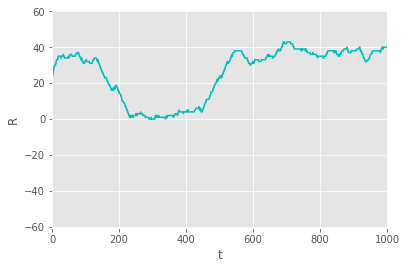

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')


plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])
r0

plt.plot(moving_average(r0s, smooth), 'c')
plt.plot(moving_average(r1s, smooth))
plt.xlabel('t');
plt.ylabel('R');

plt.savefig('img/4B_' + mode + '.png')

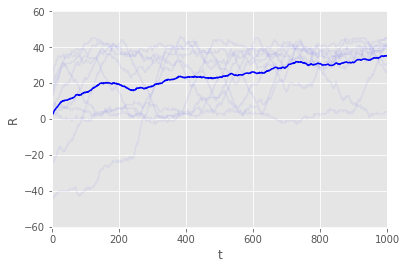

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=1)

plt.xlabel('t');
plt.ylabel('R');


plt.savefig('img/4B_' + mode + '.png')

For the adversary case (no forget):

In [7]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

23.859740259740263